# Assignment 02
The following assignment is a step-by-step process to implement a multiclass classification using Iris dataset.

**Note:**

- Please note that every question has 0.5 and it provides five out of total ten marks for the assignment. 5/10%

The video presentation 5/10%.

Without YouTube presentation you receive no mark for the submission.


In [1]:
#00 The iris.csv file (Iris dataset) is located in the Assignment folder below the current ipynb file.

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

 **Important Note:** We are NOT allowed to import the dataset from Keras. We need to upload the provided iris.csv file to colab from our Google Drive.

In [2]:
#00 1st, upload the iris.csv into your Google Drive (your Colab folder).

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#01-a Find the path of iris.csv file, and save it in a variable called fileName.

In [5]:
fileName = '/content/drive/MyDrive/ColabNotebooks/ml-assignment02/iris.csv'

In [6]:
#01-b Read the content of the iris.csv file and save it in a variable, named iris.

In [7]:
# load the dataset
iris = pd.read_csv(fileName)

In [8]:
#01-c Show the first 5 rows of the dataframe.

In [9]:
# display the first few rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As you see, the last column contains strings. We want to convert these strings to integers,  and we can work with them easily in our Neural Network model.

setosa -> 0

versicolor -> 1

virginica -> 2

In [10]:
#2-a Convert the last column strings to integers, as
# setosa -> 0
# versicolor -> 1
# virginica -> 2

In [11]:
# map species names to integers
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris['species'] = iris['species'].map(species_mapping)

In [12]:
#2-b Now, check the first 5 elements of the iris dataset once again:

In [13]:
iris.head() # first 5 are all 0 (setosa)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# count of each species total
iris['species'].value_counts() # just to illustrate the other two species got converted properly

,count
species,
0,50
1,50
2,50


In [15]:
#03-a Select the first four columns of the dataframe as the Data and call the data x.

In [16]:
# we know there are 5 columns so we can just select all columns except the last one
x = iris.iloc[:, :-1]

In [17]:
#03-b Select the last column as the label and call it y.

In [18]:
# similarily for y, we can just specify the last column as the label
y = iris.iloc[:, -1]

In [19]:
#04 Now, it is the time to split the data (x) and the label (y) into training and testin segments,
#   and call them parts x_train,x_test,y_train,y_test.

In [20]:
#04-a Split the data, and label ito training and testing segments, while the size of test data is 20%,
#     and use randome_state = 123 to make all the answers similar in the whole class.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [22]:
#04-b Check the first five rows of  x_train,x_test,y_train,y_test.

In [23]:
print("First five rows of x_train:\n", x_train.head())

First five rows of x_train:
      sepal_length  sepal_width  petal_length  petal_width
130           7.4          2.8           6.1          1.9
119           6.0          2.2           5.0          1.5
29            4.7          3.2           1.6          0.2
0             5.1          3.5           1.4          0.2
62            6.0          2.2           4.0          1.0


In [24]:
print("First five rows of x_test:\n", x_test.head())

First five rows of x_test:
      sepal_length  sepal_width  petal_length  petal_width
72            6.3          2.5           4.9          1.5
112           6.8          3.0           5.5          2.1
132           6.4          2.8           5.6          2.2
88            5.6          3.0           4.1          1.3
37            4.9          3.1           1.5          0.1


In [25]:
print("First five rows of y_train:\n", y_train.head())

First five rows of y_train:
 130    2
119    2
29     0
0      0
62     1
Name: species, dtype: int64


In [26]:
print("First five rows of y_test:\n", y_test.head())

First five rows of y_test:
 72     1
112    2
132    2
88     1
37     0
Name: species, dtype: int64


In [27]:
#04-c Check the length of the x_train and x_test. If the numbers are 120 & 30, AWESOME!
#     You are good to continue!

In [28]:
print("Length of x_train:", len(x_train))

Length of x_train: 120


In [29]:
print("Length of x_test:", len(x_test))

Length of x_test: 30


In [30]:
#05-a Convert y_train and y_test from categorical to one-hot encoded values, and call them
#     one_hot_train_labels, and one_hot_test_labels, respectively.

In [31]:
# convert labels to one-hot encoding
one_hot_train_labels = to_categorical(y_train, num_classes=3)
one_hot_test_labels = to_categorical(y_test, num_classes=3)

print(one_hot_train_labels[:5])
print(one_hot_test_labels[:5])

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [32]:
#06-a Define a sequential model that contains 3 dense layers.
#     In the first and second layers, use 100 hidden units (neurons) and a 'relu' activation function.
#     For the last layer, we need to use 3 as the number of output,
#     and the reason is we have three classes (setosa -> 0, versicolor -> 1, virginica -> 2)
#     Also, please pick an appropriate loss function for the last layer.
#     (You may already have guessed what could be the best loss function when we have converted the categorical values to encoded values.)

In [58]:
# define the nn model - 10-a-i
model = Sequential([
    Dense(100, activation='relu', input_shape=(4,)),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,903 (42.59 KB)

 Trainable params: 10,903 (42.59 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#06-b Now, compile your model using the 'rmsprop' optimizer, an appropriate loss function, and 'accuracy' for your metrics.

In [62]:
# 10-a-ii
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
#07-a Train your model using epoch=20, batch=10.

In [63]:
# 10-a-iii
history = model.fit(x_train, one_hot_train_labels, epochs=20, batch_size=10, validation_data=(x_test, one_hot_test_labels))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9636 - loss: 0.0949 - val_accuracy: 0.9667 - val_loss: 0.1251
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9367 - loss: 0.1135 - val_accuracy: 0.9667 - val_loss: 0.1315
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9785 - loss: 0.0855 - val_accuracy: 0.9667 - val_loss: 0.1090
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9828 - loss: 0.0756 - val_accuracy: 0.8667 - val_loss: 0.2129
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9608 - loss: 0.0988 - val_accuracy: 0.9667 - val_loss: 0.1182
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9753 - loss: 0.0578 - val_accuracy: 0.8667 - val_loss: 0.2146
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9831 - loss: 0.0821 - val_accuracy: 0.9667 - val_loss: 0.0946
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9552 - loss: 0.0816 - val_accuracy: 0.9667 - val_l

In [38]:
#08-a Calculate the result, evaluating x_test and one_hot_test_label, and report on the accuracy of your model.

In [64]:
# 10-a-iv
test_loss, test_accuracy = model.evaluate(x_test, one_hot_test_labels)

print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9667 - loss: 0.0869
Test Accuracy: 0.9667


In [40]:
#09-a Now, we repeat all we have done in #06-a with the following parameters:
#     In the first and second hidden layers, use 10 hidden units (neurons) and a 'relu' activation function.
#     For the output layer, we need to use 3.

In [41]:
model2 = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
#09-b Use the same settings as for #06-b (compile using the same optimizer, loss function) and output the accuracy

In [43]:
model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [44]:
#09-c Please fit your model using epoch=4, batch=10.

In [45]:
history2 = model2.fit(x_train, one_hot_train_labels, epochs=20, batch_size=10, validation_data=(x_test, one_hot_test_labels))

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3427 - loss: 1.0845 - val_accuracy: 0.4333 - val_loss: 1.0154
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2900 - loss: 1.0811 - val_accuracy: 0.5000 - val_loss: 0.9965
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4258 - loss: 1.0371 - val_accuracy: 0.6000 - val_loss: 0.9784
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5957 - loss: 0.9899 - val_accuracy: 0.6333 - val_loss: 0.9606
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5844 - loss: 1.0003 - val_accuracy: 0.6333 - val_loss: 0.9404
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7044 - loss: 0.9585 - val_accuracy: 0.6333 - val_loss: 0.9178
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6852 - loss: 0.9521 - val_accuracy: 0.6333 - val_loss: 0.9031
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7003 - loss: 0.9346 - val_accuracy: 0.6333 - val_los

In [46]:
#09-d Calculate the result, evaluating x_test and one_hot_test_label, and report on the accuracy of your model.

In [47]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, one_hot_test_labels)

print(f"Test Accuracy (New Model): {test_accuracy2:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9667 - loss: 0.6308
Test Accuracy (New Model): 0.9667


In [48]:
#10-a In your video submission, explain each line of your code, and the arguments you've used
# Ensure to answer the following questions at a minimum:
# 10-a-i) How the number of layers or hidden units could impact the accuracy of our model.
# 10-a-ii) Do we always suffer from overfitting?
# 10-a-iii) How can we detect overfitting?
# 10-a-iv) How can we reduce overfitting?

In [49]:
#10-b
# Use different settings than the ones we chose in #09
# Change each of the following once:
#   i)   optimizer
#   ii)  number of layers
#   iii) hidden units
#   iv)  number of epochs
#   v)   batch_size

# Change one parameter at a time, and rerun the cell(s), then explain the output

# There was not enough time in the video to get to 10-b so i included some graphs with quick text to cover that.

In [66]:
# 10-b-i
# RMSprop starts with a lower loss and decreases it more efficiently, leading to better generalization (lower validation loss)
# RMSprop is the better choice for this dataset, while Adam may require tuning to improve performance.

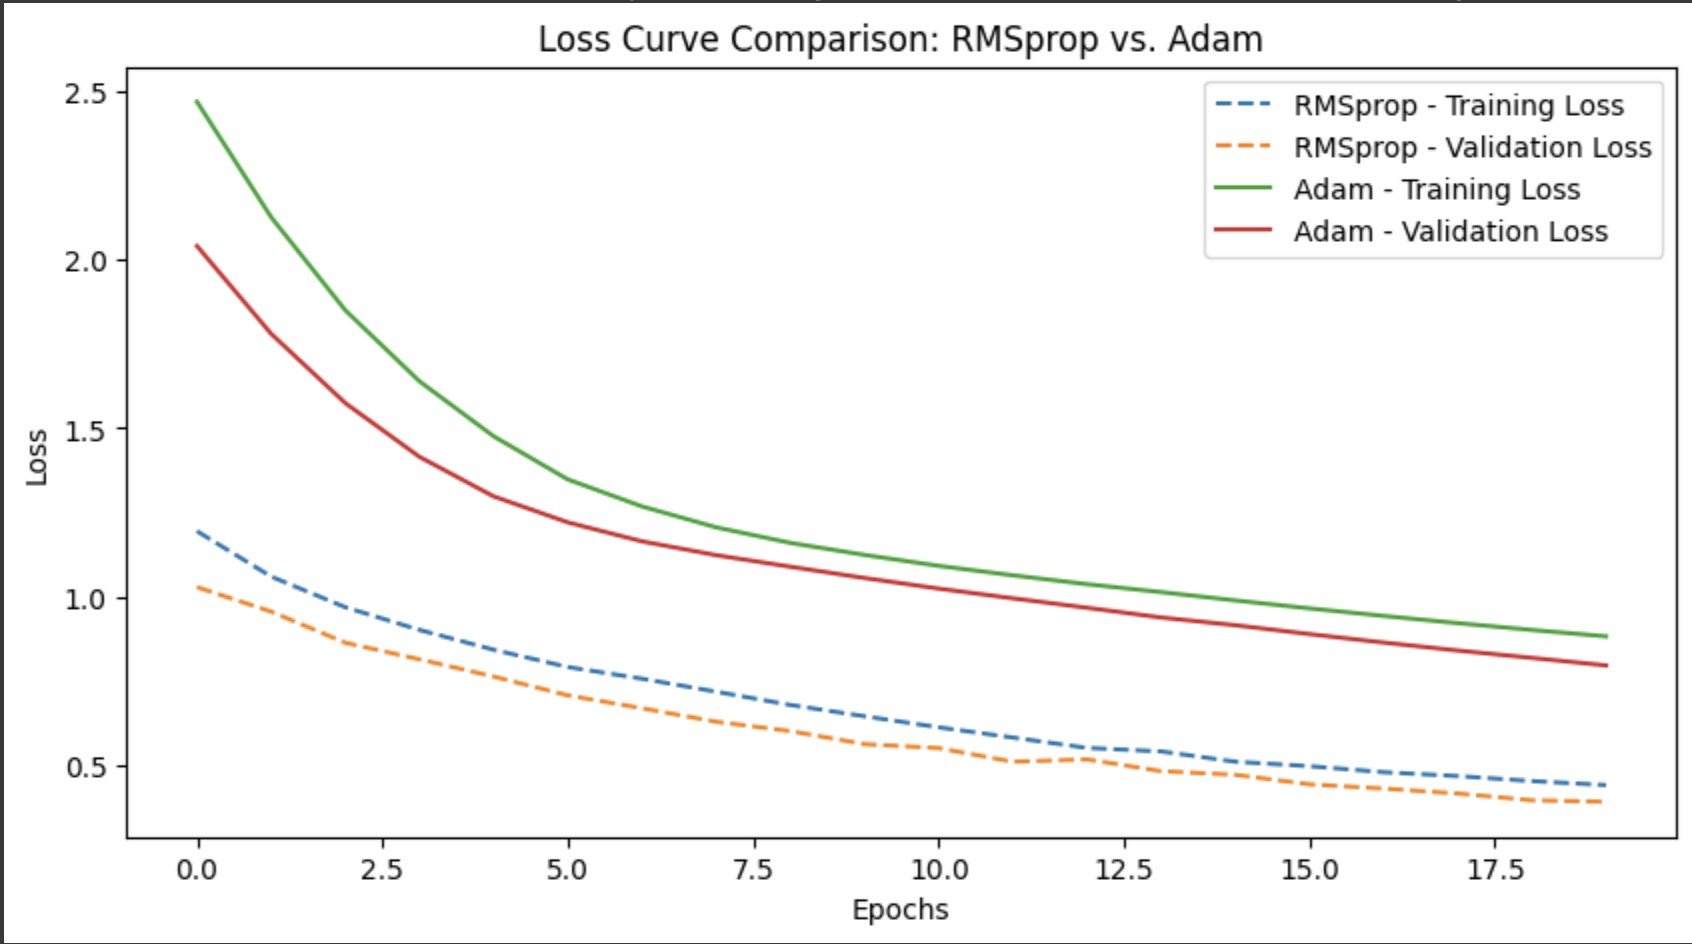

In [67]:
#10-b-ii
# The 4-layer model (green & red dashed lines) achieves lower loss and higher accuracy compared to the 2-layer model (blue & orange solid lines),
# indicating better learning capacity.

# However, the 2-layer model struggles to improve, showing high validation loss and unstable accuracy, suggesting it may be too simple for this dataset.
# This suggests that adding more layers improved performance in this case, likely by capturing more complex patterns.

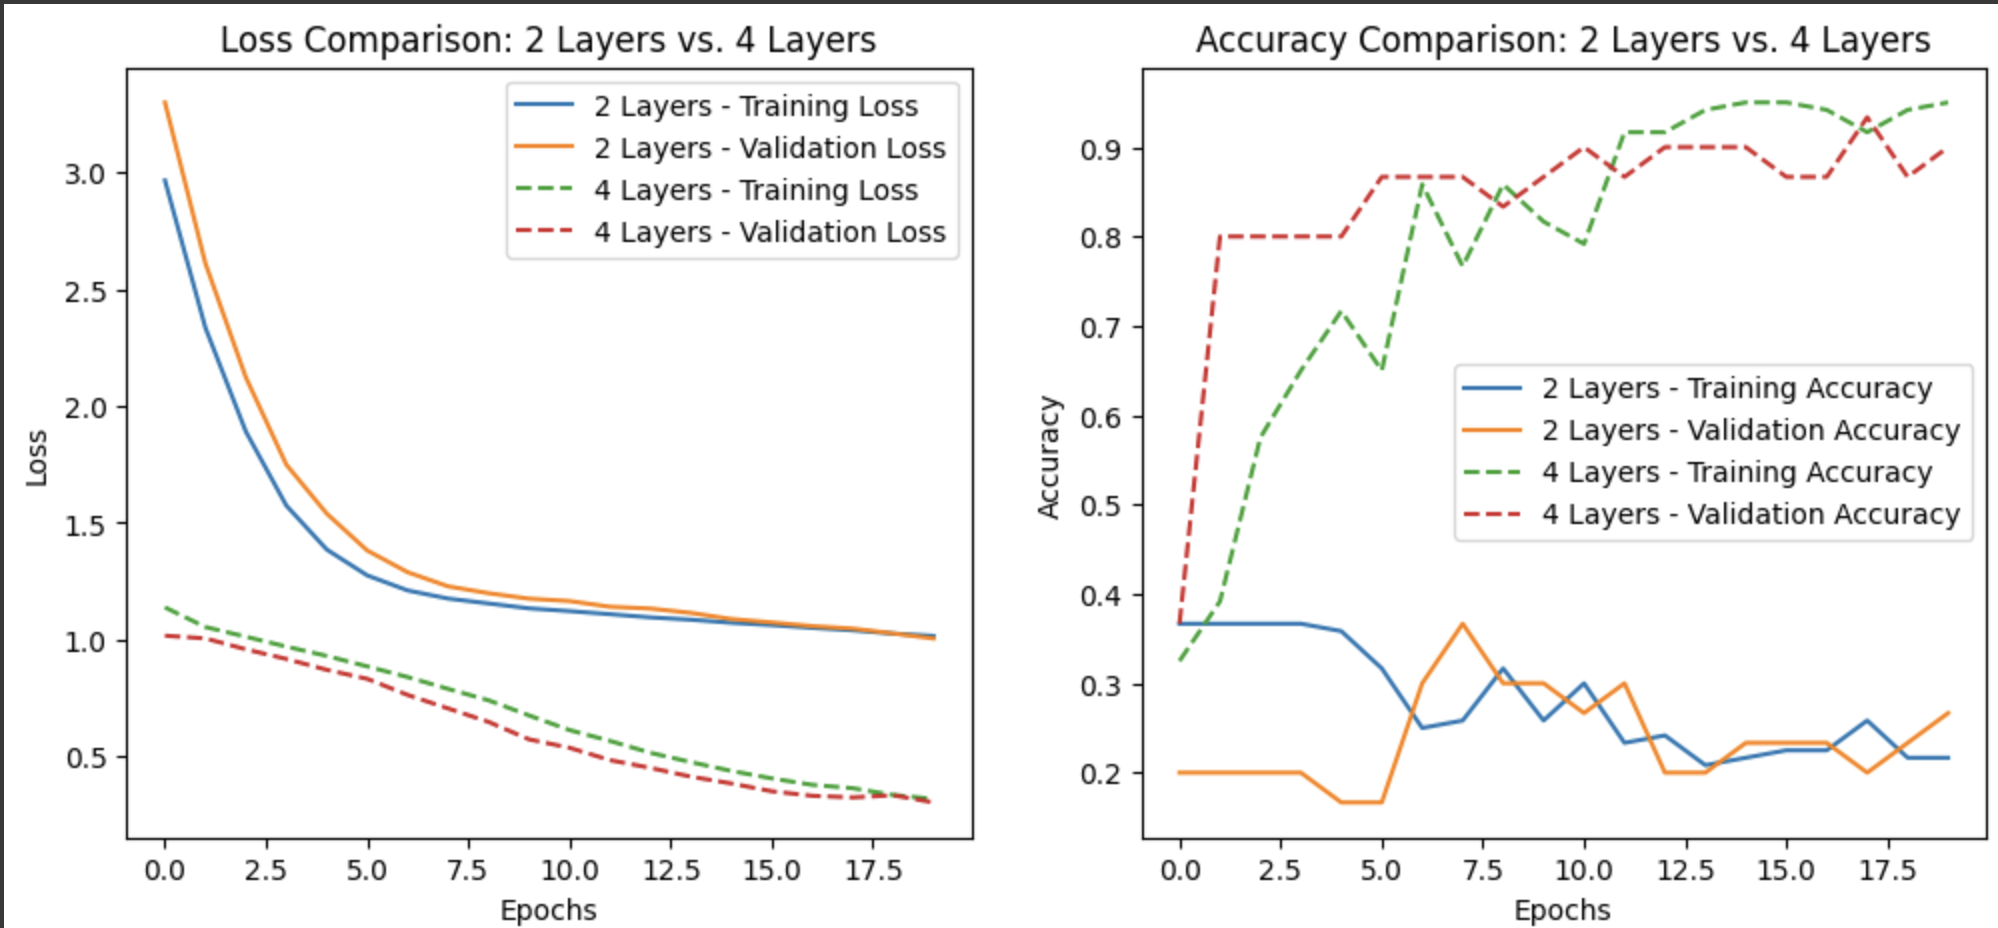

In [68]:
#10-b-iii
# The 50-neuron model (green & red dashed lines) reaches higher accuracy faster and achieves a lower training and validation loss,
# indicating it is learning more effectively. However, the validation accuracy fluctuates, suggesting some overfitting, whereas the
# 10-neuron model (blue & orange solid lines) learns more gradually and stabilizes later. This suggests that for the iris dataset,
# the 50-neuron model captures more patterns and performs better, but may require regularization to improve stability.

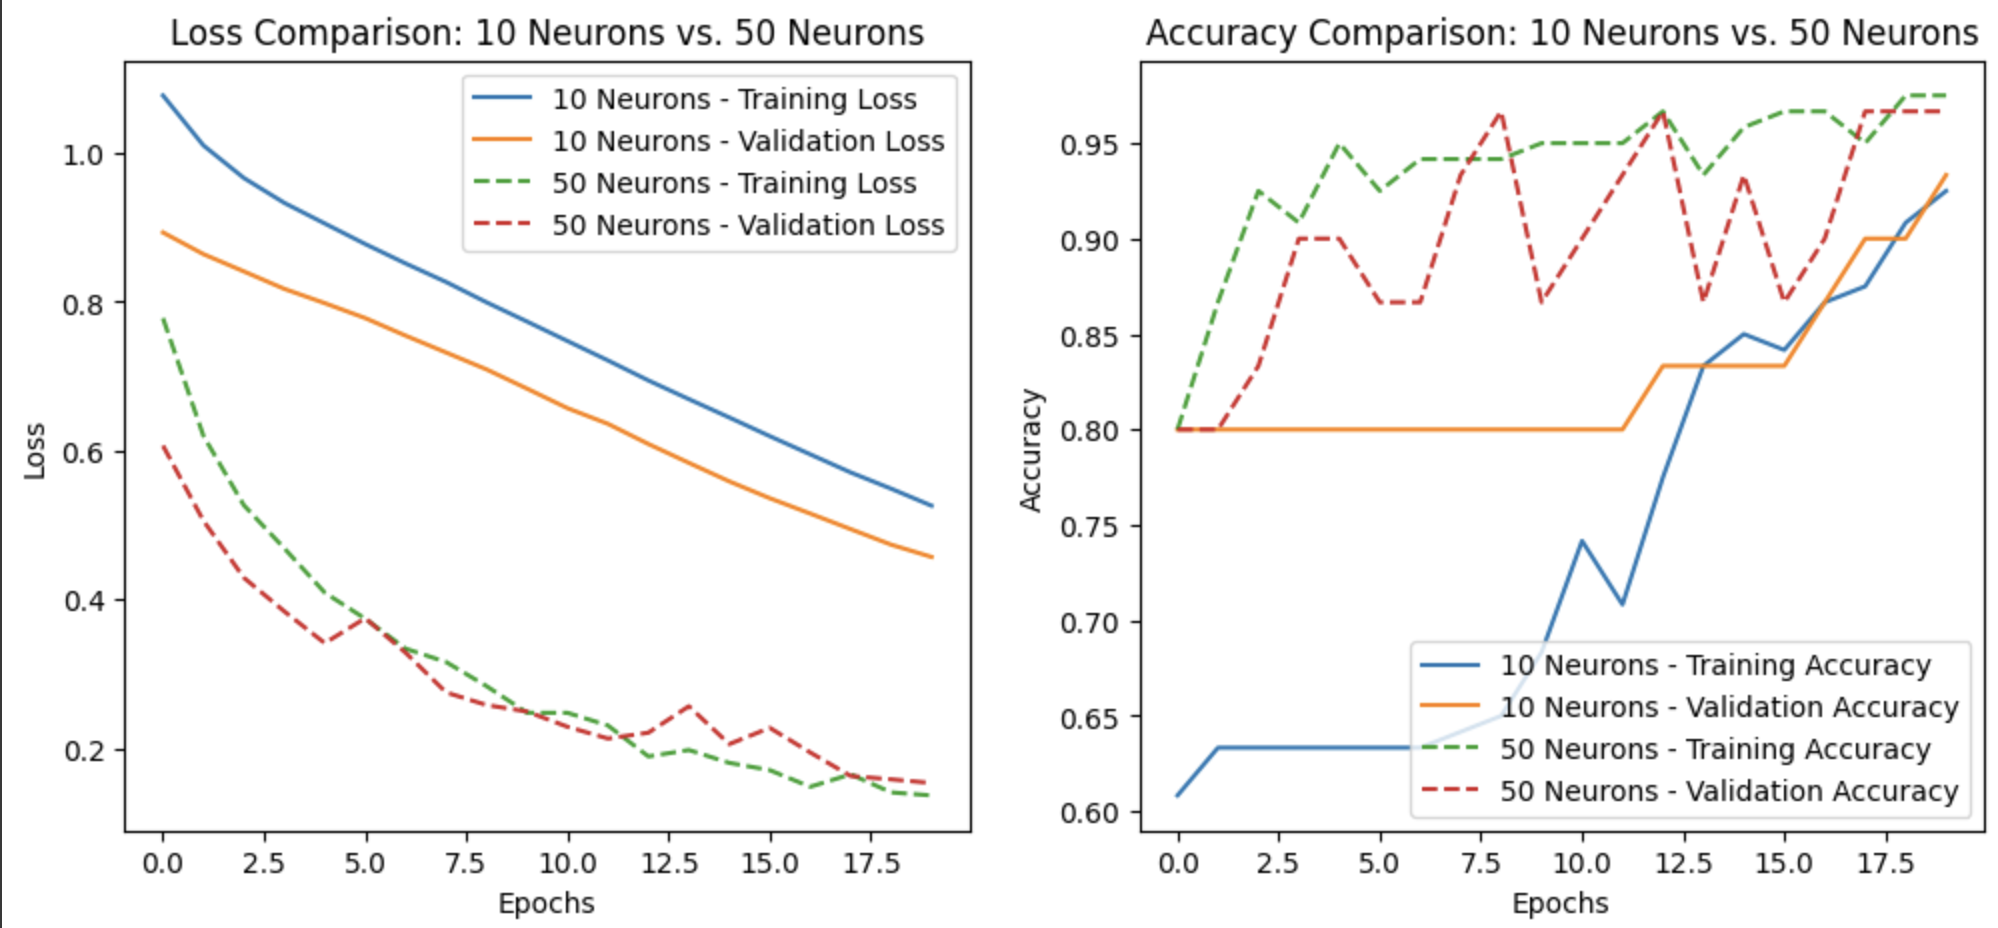

In [ ]:
#10-b-iv
# The 10-epoch model underfits, as accuracy remains low, while the 50-epoch model learns better but shows validation fluctuations,
# suggesting some overfitting. A middle ground (20-30 epochs) may provide a better balance.

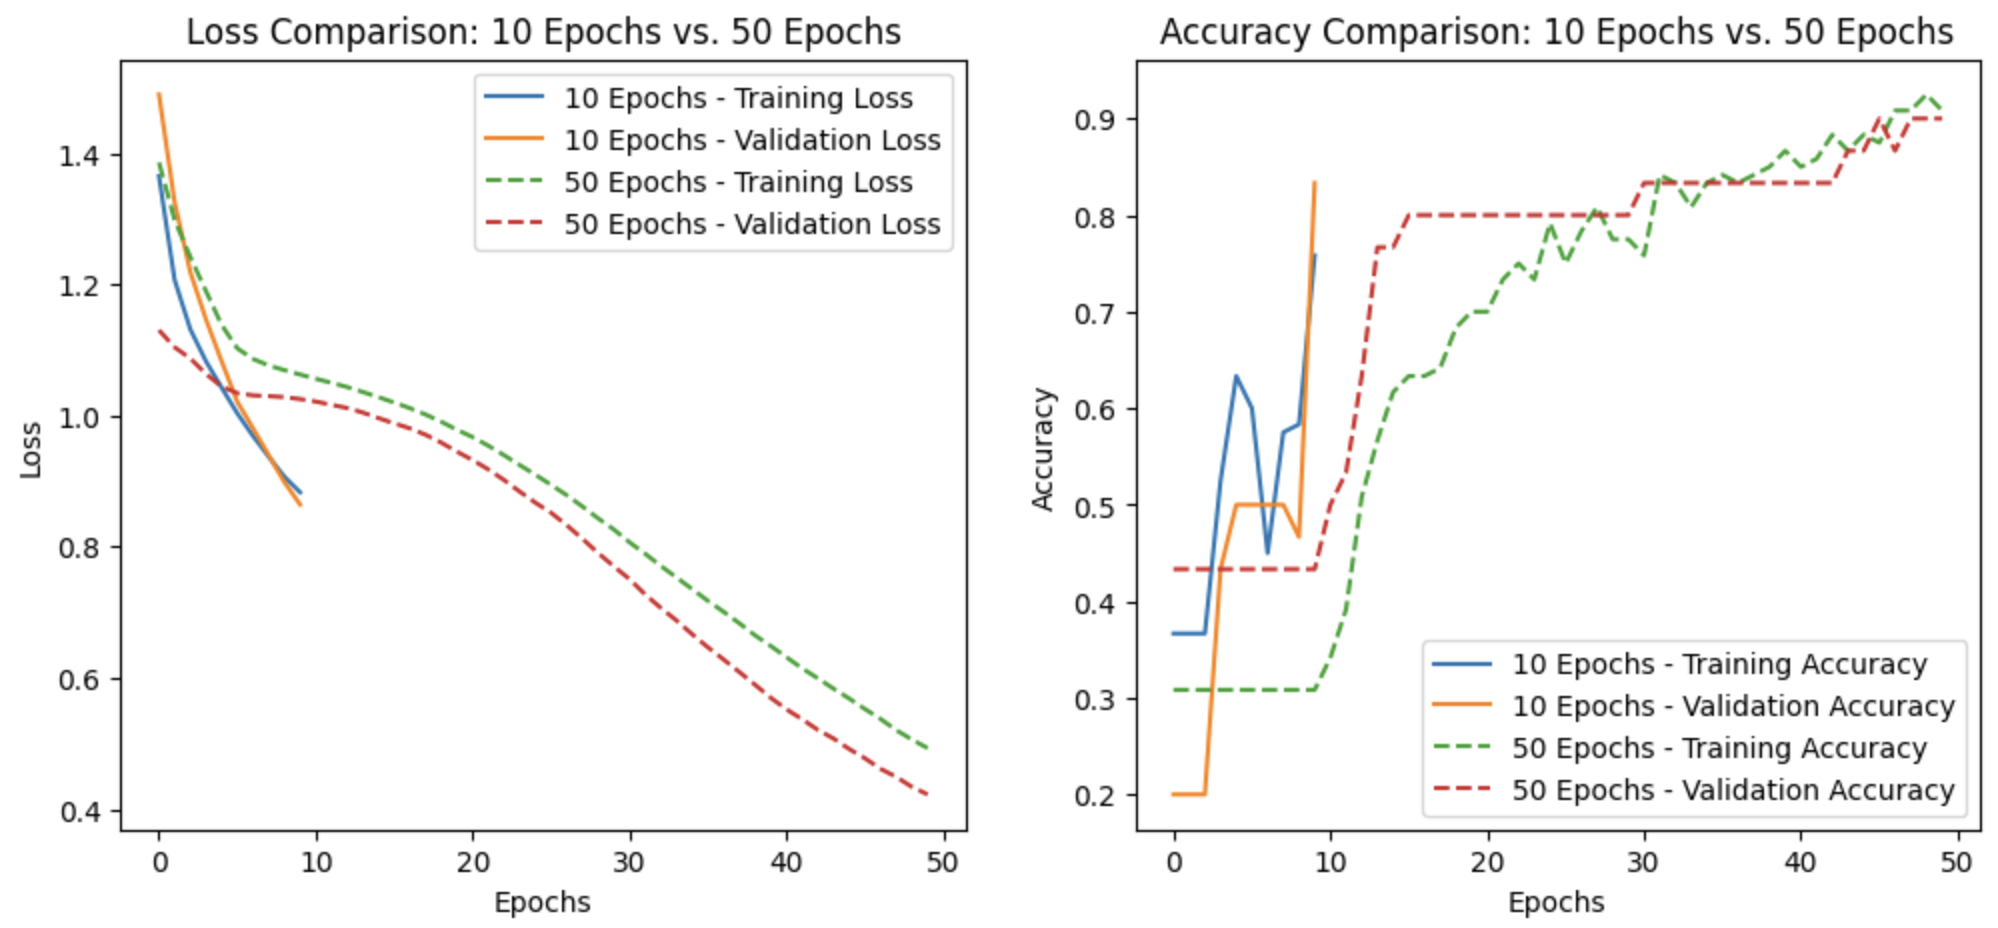

In [ ]:
#10-b-v
# The small batch size (5) model learns faster and generalizes better, while the large batch size (32) model learns slower and
# struggles with validation accuracy. This suggests smaller batches (5-10) are better for this dataset, while larger batches
# may be too stable and less adaptive.

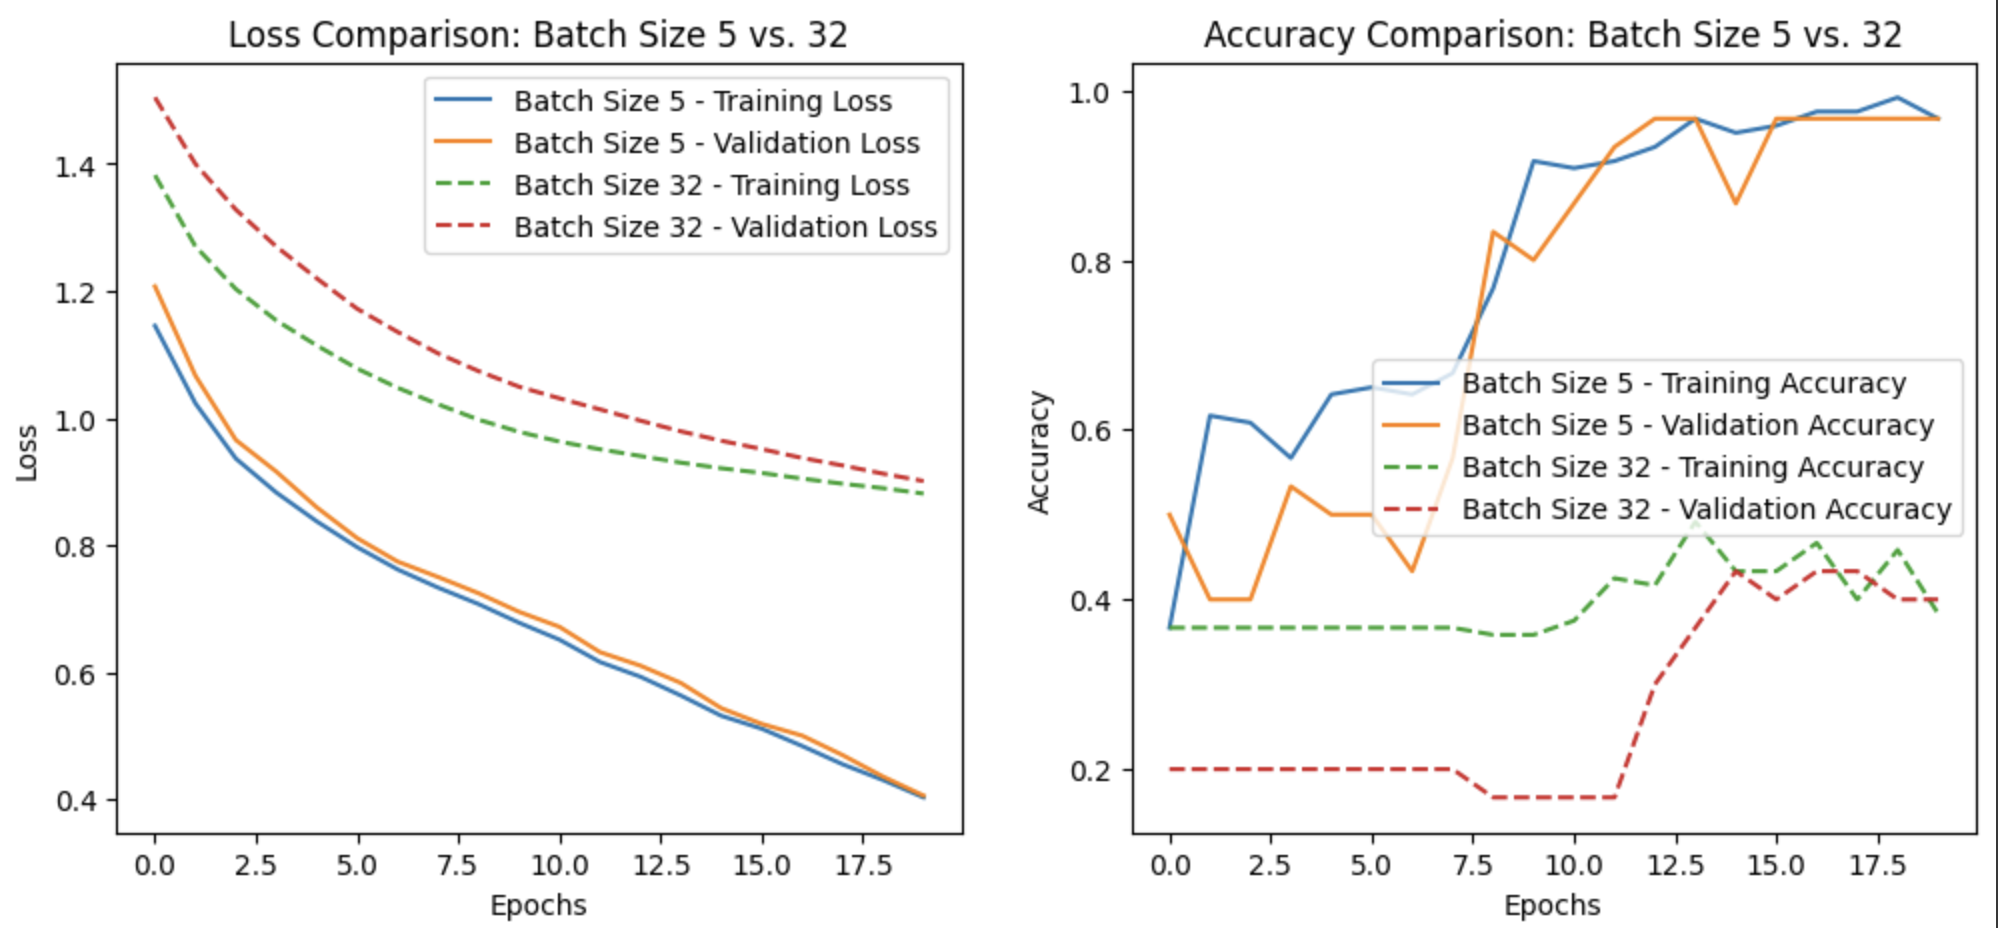

---
# Deliverables:
1. Submit the current ipynb file on D2L
2. Please record and upload to YouTube 3-6 minute recorded video clip (aim for 5 minutes) describing the answers to the questions above, espcially #10.

Notes:
- In your submission, YOU MUST SUBMIT A LINK TO YOUR YOUTUBE VIDEO as a TEXT SUBMISSION SECTION on your D2L submission.
- Omitting this D2L comment will result in a 0% for your total mark.